# Visual Verification of Climate Data Content

**Goal:** To visually confirm that the downloaded yearly GRIB files contain unique and variable data, despite having the same file size. We will plot samples from different years and for different variables.

In [2]:
# Cell 1: Setup and Reusable Plotting Function
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

def plot_climate_variable(year, month, variable_short_name, variable_long_name, units, cmap='viridis'):
    """
    Loads a specific variable for a specific month and year, and plots it on a map.
    """
    print(f"--- Plotting: {variable_long_name} for {year}-{month:02d} ---")
    
    # --- Configuration ---
    file_path = f'../data/climate_monthly_full/era5_land_monthly_{year}.grib'
    
    if not os.path.exists(file_path):
        print(f"ERROR: File not found: {file_path}")
        return

    try:
        # --- Load the specific variable from the file ---
        ds = xr.open_dataset(
            file_path,
            engine="cfgrib",
            backend_kwargs={"indexpath": "", "filter_by_keys": {"shortName": variable_short_name}},
        )
        
        # Find the variable's name in the dataset (e.g., 't2m' for shortName '2t')
        var_name = list(ds.data_vars)[0]
        data_array = ds[var_name]

        # Select the data for the specific month
        # The monthly data is timestamped on the 1st of the month
        date_str = f"{year}-{month:02d}-01"
        data_month = data_array.sel(time=date_str)

        # --- Unit Conversions ---
        if variable_short_name == '2t':
            data_month = data_month - 273.15 # Kelvin to Celsius
        if variable_short_name == 'tp':
            data_month = data_month * 1000 # m to mm

        # --- Plotting ---
        plt.figure(figsize=(15, 7))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
        
        data_month.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            cbar_kwargs={'label': f"{variable_long_name} ({units})"}
        )
        
        plt.title(f"{variable_long_name} - {year}-{month:02d}")
        plt.show()

    except Exception as e:
        print(f"  -> FAILED to process and plot. Error: {e}")

## Comparison 1: Same Month, Different Years

Let's compare the temperature in July for an early year (1985) versus a late year (2015). If the data is unique, these maps should look different, likely showing a warming trend.

--- Plotting: 2m Temperature for 1985-07 ---


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


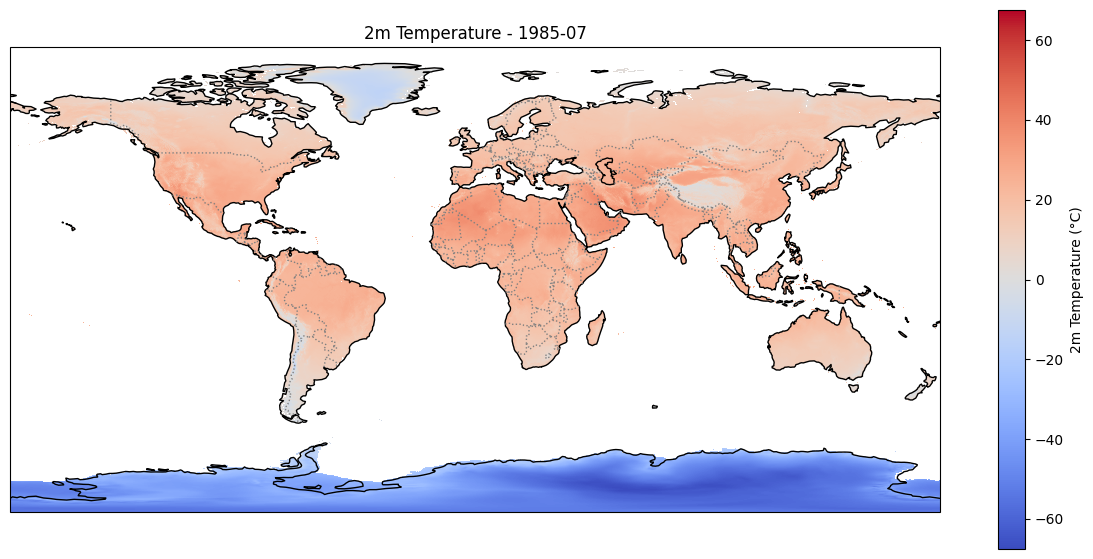

--- Plotting: 2m Temperature for 2015-07 ---


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


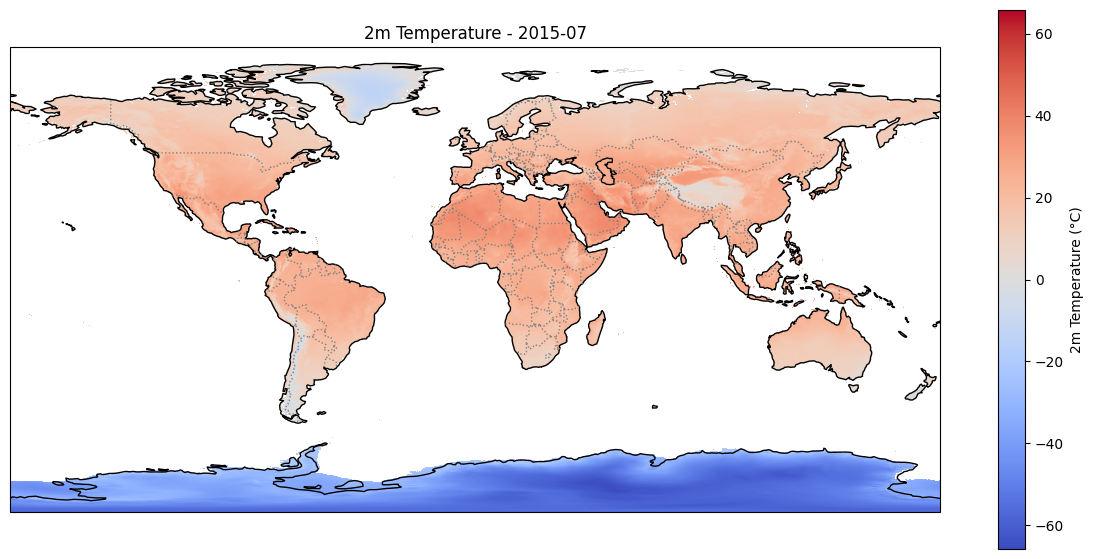

In [3]:
# Cell 2: Temperature Comparison

# Plot July temperature for an early year
plot_climate_variable(year=1985, month=7, 
                      variable_short_name='2t', variable_long_name='2m Temperature', 
                      units='°C', cmap='coolwarm')

# Plot July temperature for a late year
plot_climate_variable(year=2015, month=7, 
                      variable_short_name='2t', variable_long_name='2m Temperature', 
                      units='°C', cmap='coolwarm')

## Comparison 2: Same Year, Different Variables

Now let's compare two different variables (Temperature and Precipitation) for the exact same month and year (July 1995). This will prove that the files contain distinct physical data.

--- Plotting: 2m Temperature for 1995-07 ---


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


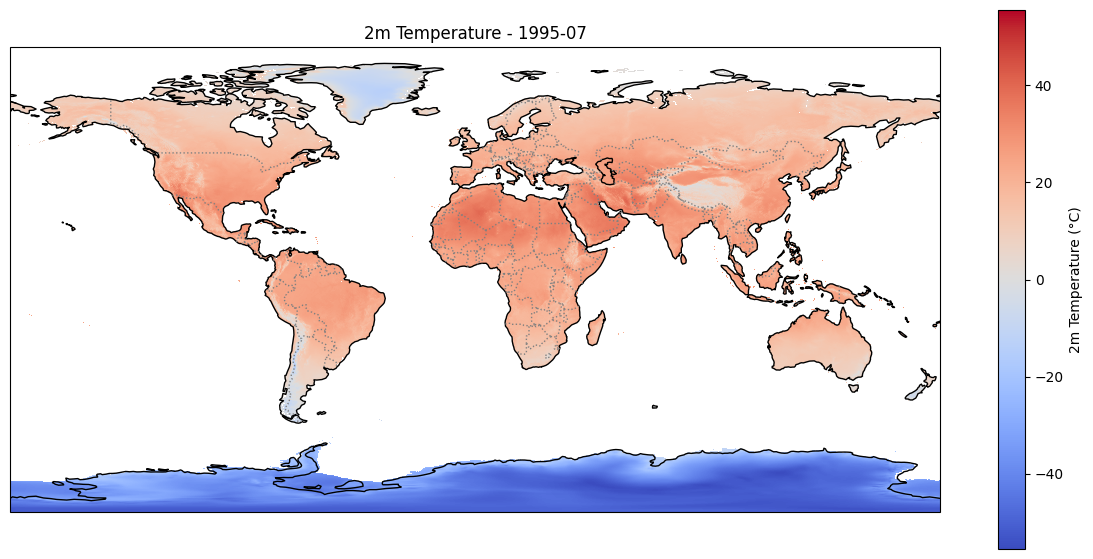

--- Plotting: Total Precipitation for 1995-07 ---


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


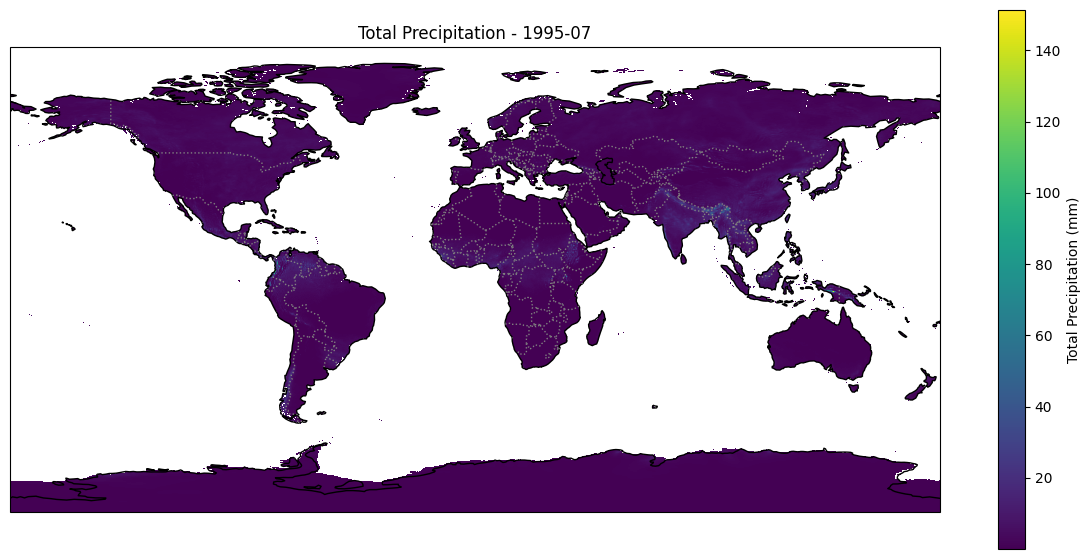

In [4]:
# Cell 3: Variable Comparison

# Plot July temperature for 1995
plot_climate_variable(year=1995, month=7, 
                      variable_short_name='2t', variable_long_name='2m Temperature', 
                      units='°C', cmap='coolwarm')

# Plot July precipitation for 1995
plot_climate_variable(year=1995, month=7, 
                      variable_short_name='tp', variable_long_name='Total Precipitation', 
                      units='mm', cmap='viridis')

## Quantitative Comparison: July 1985 vs. July 2015

The visual difference between the two temperature maps is subtle. To confirm the data is unique, we will:
1.  Calculate and compare summary statistics for both maps.
2.  Create a "difference map" by subtracting the 1985 data from the 2015 data to highlight the areas of warming and cooling.

--- Loading data for comparison ---


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Loaded July 1985 data.


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Loaded July 2015 data.

--- Summary Statistics (°C) ---
      July 1985  July 2015
Mean      -1.75      -0.90
Min      -67.57     -65.83
Max       39.53      40.88

--- Plotting the difference between the two maps (2015 minus 1985) ---


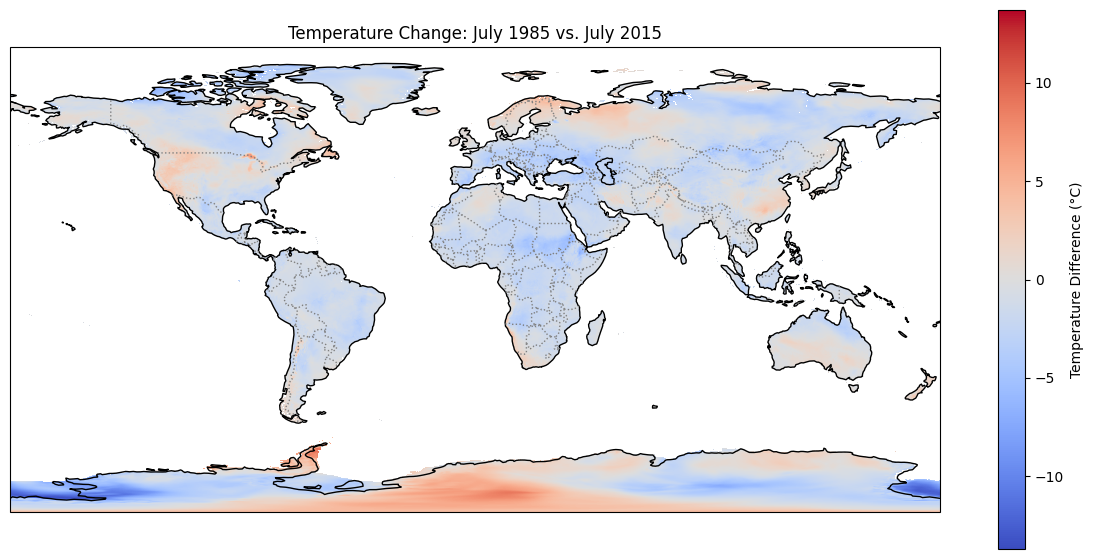

In [6]:
# Cell 4: Quantitative and Visual Difference Analysis
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- 1. Load the data for both years ---
print("--- Loading data for comparison ---")

# Load 1985 Data
ds_1985 = xr.open_dataset(
    '../data/climate_monthly_full/era5_land_monthly_1985.grib',
    engine="cfgrib",
    backend_kwargs={"indexpath": "", "filter_by_keys": {"shortName": "2t"}},
)
temp_1985 = ds_1985['t2m'].sel(time="1985-07-01") - 273.15
print("Loaded July 1985 data.")

# Load 2015 Data
ds_2015 = xr.open_dataset(
    '../data/climate_monthly_full/era5_land_monthly_2015.grib',
    engine="cfgrib",
    backend_kwargs={"indexpath": "", "filter_by_keys": {"shortName": "2t"}},
)
temp_2015 = ds_2015['t2m'].sel(time="2015-07-01") - 273.15
print("Loaded July 2015 data.")

# --- 2. Create the Summary Statistics Table ---
print("\n--- Summary Statistics (°C) ---")

stats = {
    'July 1985': {
        'Mean': temp_1985.mean().item(),
        'Min': temp_1985.min().item(),
        'Max': temp_1985.max().item(),
    },
    'July 2015': {
        'Mean': temp_2015.mean().item(),
        'Min': temp_2015.min().item(),
        'Max': temp_2015.max().item(),
    }
}

stats_df = pd.DataFrame(stats)
print(stats_df.round(2))

# --- 3. Calculate and Plot the Difference Map ---
print("\n--- Plotting the difference between the two maps (2015 minus 1985) ---")

# Calculate the difference
temp_difference = temp_1985 - temp_2015

plt.figure(figsize=(15, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

# A diverging colormap is essential for showing differences.
# Red = 2015 was warmer. Blue = 2015 was cooler. White = No change.
temp_difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    center=0, # This centers the colormap on zero
    cbar_kwargs={'label': 'Temperature Difference (°C)'}
)

plt.title("Temperature Change: July 1985 vs. July 2015")
plt.show()